In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Data Collection & analysis

In [104]:
# loading the data from csv file to a Pandas Dataframe
df=pd.read_csv('insurance.csv')

In [105]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.shape

(1338, 7)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Categorical Features:
1->Sex  2:->Smoker  3;->Region

In [108]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [109]:
#Statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## distribution of age value


<Figure size 600x600 with 0 Axes>

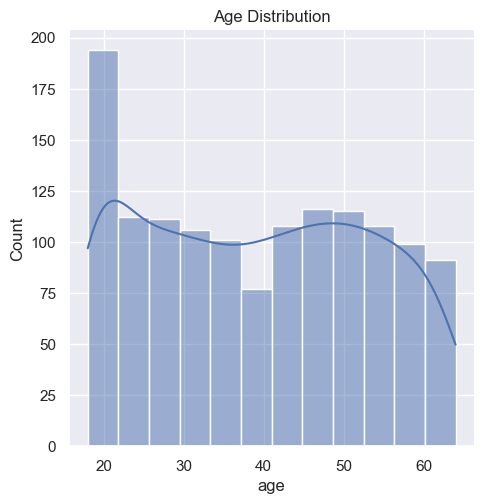

In [110]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

### In the above graph, We have seen which age group of people have taken the most insurance

## Gender column


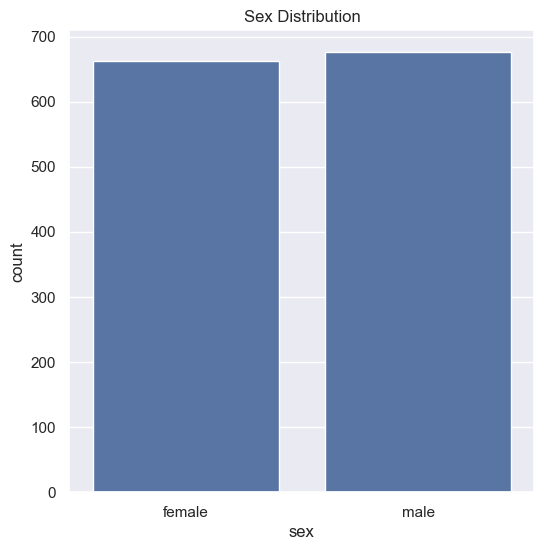

In [111]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

### In above graph , We saw which gender has taken the most insurance

In [112]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [113]:
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

<Figure size 600x600 with 0 Axes>

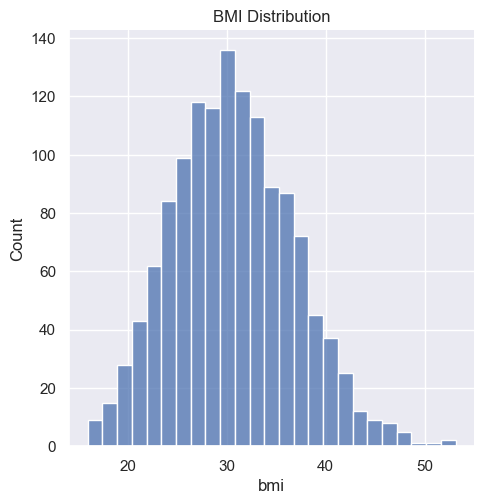

In [114]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

# normal BMI Range --> 18.5 to 24.9

In [115]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

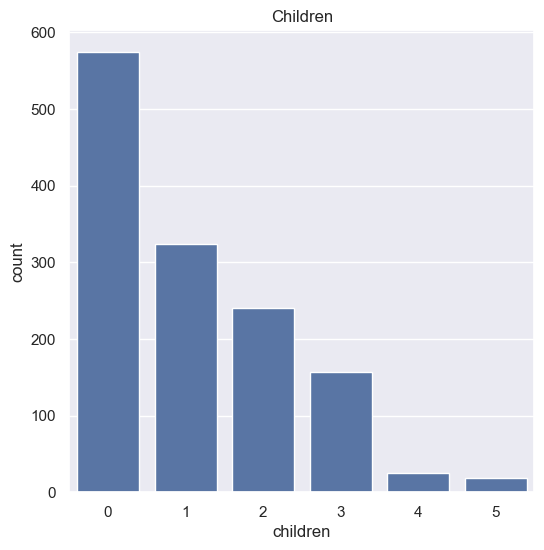

In [116]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

### This graph shows the number of children the people taking insurannce have

In [117]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [150]:
# Count Somker column

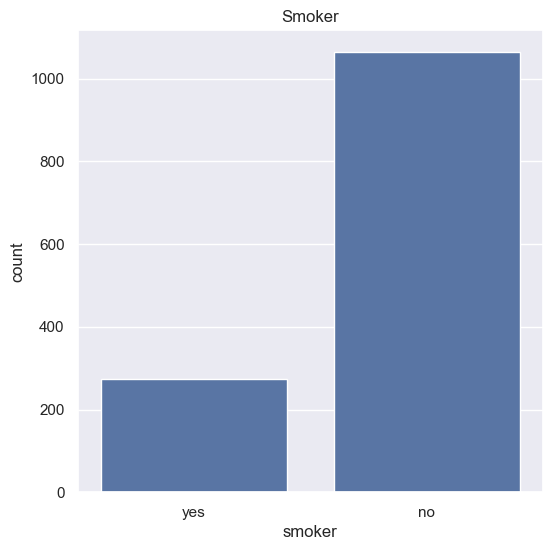

In [118]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

In [119]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

### This graph shows how many people are smokers

## region column


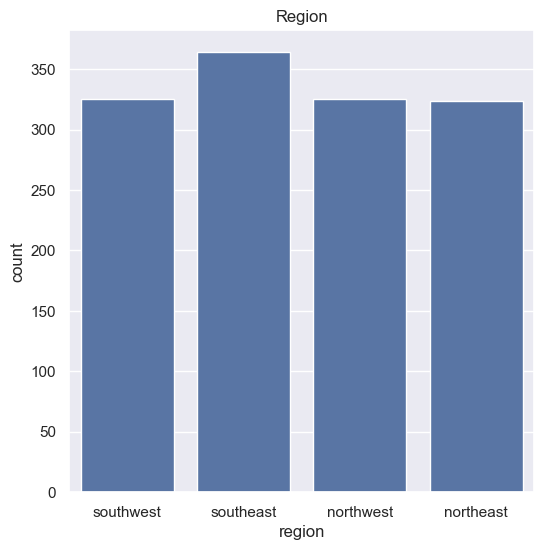

In [120]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [121]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### This graph shows which region's people have taken the most insurance .

## distribution of charges value


<Figure size 600x600 with 0 Axes>

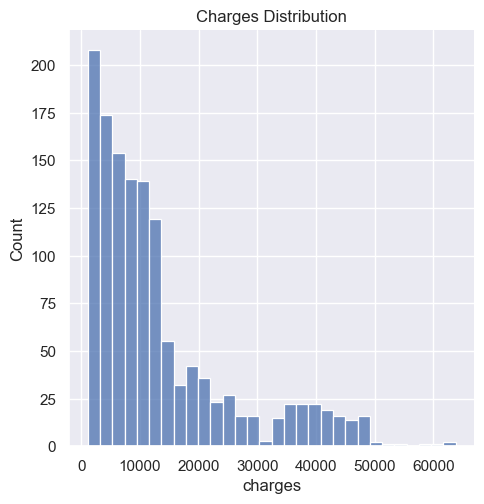

In [122]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

### This graph shows how much insurance costs.

# Data Pre_processing

In [123]:
df.shape

(1338, 7)

## Encoding the categorical features

In [124]:
# encodeing sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#encodeing 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

## Splitting the Features and Target

In [125]:
X=df.drop(columns='charges',axis=1)
y=df['charges']

In [126]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [127]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into training data & Testing Data

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [129]:
print("Shape of X: ", X.shape)
print("Shape of X_train: " ,X_train.shape)
print("Shape of X_test: ",X_test.shape)

Shape of X:  (1338, 6)
Shape of X_train:  (1070, 6)
Shape of X_test:  (268, 6)


In [130]:
print("Shape of y: ", y.shape)
print("Shape of y_train: " ,y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of y:  (1338,)
Shape of y_train:  (1070,)
Shape of y_test:  (268,)


## 1.Multiple linear Regression

In [133]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred_mlr=mlr.predict(X_test)

In [135]:
r2_mlr=r2_score(y_test,y_pred_mlr)

In [136]:
print(f'R-squared: {r2_mlr}')

R-squared: 0.7447273869684077


# 2:-> support vector Regression

In [137]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train,y_train)

SVR()

In [138]:
y_pred_svr = svr_reg.predict(X_test)

In [139]:
r2_svr_reg=r2_score(y_test,y_pred_svr)
print("R-squared Score:",r2_svr_reg)

R-squared Score: -0.08038132828590361


# 3:->Random Forest Regressor

In [140]:
rf = RandomForestRegressor()#(n_estimators=10,random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [141]:
y_pred_red=rf.predict(X_test)

In [142]:
r2_rf=r2_score(y_test,y_pred_red)
print("R-Squared Score: ",r2_rf)

R-Squared Score:  0.8409231581617083


# 4:-> Polynomial regression

In [143]:
poly = PolynomialFeatures(degree=2 , include_bias=True)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
mlr.fit(x_train_poly,y_train)
y_pred_poly=mlr.predict(x_test_poly)


In [144]:
# Calculate R-squared score
r2_poly_reg = r2_score(y_test, y_pred_poly)
print('R-squared Score:', r2_poly_reg)

R-squared Score: 0.852903942004926


# 5:-> Decicion Tree Regression

In [145]:
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [146]:
y_pred_dtr=dtr.predict(X_test)

In [147]:
# Calculate R-squared score
r2_dtr_reg = r2_score(y_test, y_pred_dtr)
print('R-squared Score:', r2_dtr_reg)

R-squared Score: 0.7108862456786347


In [148]:
models= pd.DataFrame({
    'Model' :['Multiple linear Regression','support vector Regression','Random Forest Regressor',
             'Polynomial regression','Decision Tree Regression'],
    'Score':[r2_lr,r2_svr_reg,r2_rf,r2_poly_reg,r2_dtr_reg]
})
models.sort_values(by = 'Score' ,ascending=False)

,Model,Score
3,Polynomial regression,0.852904
2,Random Forest Regressor,0.840923
0,Multiple linear Regression,0.744727
4,Decision Tree Regression,0.710886
1,support vector Regression,-0.080381


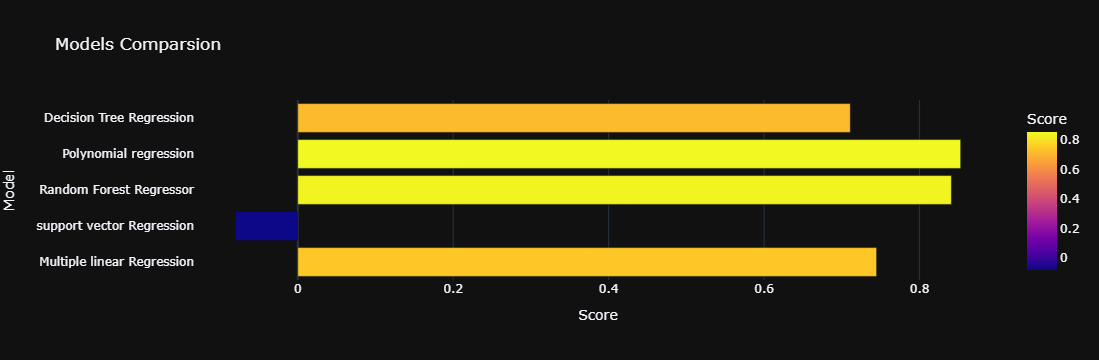

In [149]:
import plotly.express as px
px.bar(data_frame = models,x='Score',y='Model',color='Score',template = 'plotly_dark',title = 'Models Comparsion')

# We Comspared all the models and we got the highest score and that model is polynomial regression(85.28%)